In [1]:
import sys
import os
sys.path.append(os.path.abspath("../src"))
import pandas as pd
import joblib

from evaluation.model_evaluator import ModelEvaluator


In [2]:
# Load model and data
model = joblib.load('../models/logistic_model.pkl')  # or random_forest_model.pkl
_, _, X_test, y_test, _ = joblib.load('../data/preprocessed_data.pkl')


In [3]:
# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # For PR curve


🧪 Evaluation Report for Logistic Regression
----------------------------------------
F1 Score: 0.35672707303679296

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.83      0.89     27393
           1       0.26      0.57      0.36      2830

    accuracy                           0.81     30223
   macro avg       0.60      0.70      0.62     30223
weighted avg       0.88      0.81      0.84     30223



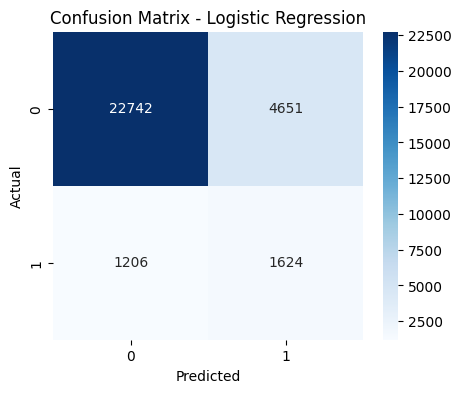

Precision-Recall AUC: 0.36971875401211035


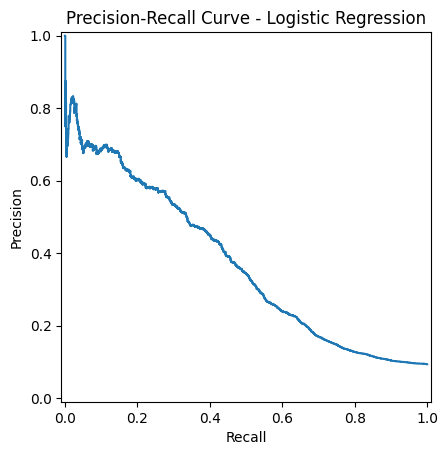

/home/liya/Desktop/KAIM/fraud-detection-for-eCommerce-w8/.venv/lib/python3.12/site-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


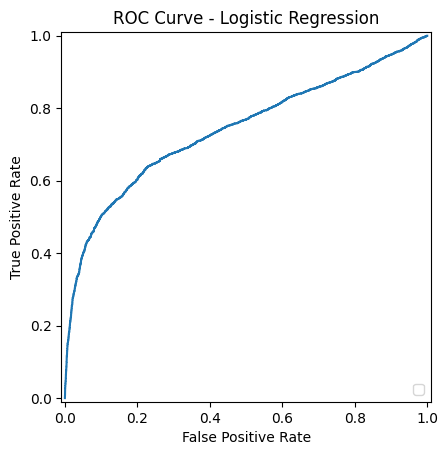

In [4]:
# Evaluate
evaluator = ModelEvaluator(model_name="Logistic Regression")
evaluator.evaluate(y_test, y_pred, y_proba)

In [5]:
# Load Random Forest model
rf_model = joblib.load('../models/random_forest_model.pkl')

In [6]:
# Load test data
_, _, X_test, y_test, _ = joblib.load('../data/preprocessed_data.pkl')

In [7]:
# Predict
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # probability for class 1


🧪 Evaluation Report for Random Forest
----------------------------------------
F1 Score: 0.6968799817809155

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     27393
           1       0.98      0.54      0.70      2830

    accuracy                           0.96     30223
   macro avg       0.97      0.77      0.84     30223
weighted avg       0.96      0.96      0.95     30223



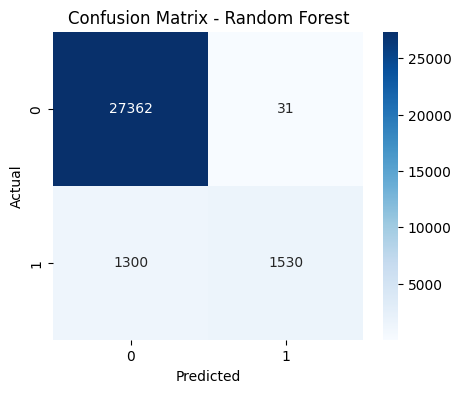

Precision-Recall AUC: 0.6319978044513885


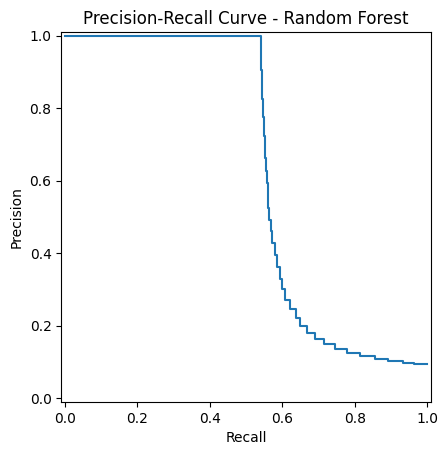

/home/liya/Desktop/KAIM/fraud-detection-for-eCommerce-w8/.venv/lib/python3.12/site-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


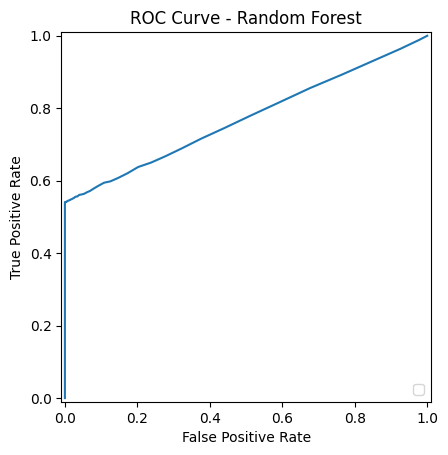

In [8]:
# Evaluate
rf_evaluator = ModelEvaluator(model_name="Random Forest")
rf_evaluator.evaluate(y_test, y_pred_rf, y_proba_rf)